In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
input_path="C:\\Users\\Farima\\OneDrive\\Data\\PhD\\StackOverFlow-data\\Users\\FinalCsvFiles\\Users_2017_2020.csv"

In [72]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [84]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [74]:
from scipy.stats import f_oneway

#call data frame
#group1 dataframe1
#group2 dataframe2
#group3 dataframe 3
#you can call as many dataframes as you like 
# f_oneway(group1, group2, group3)

In [51]:
data=pd.read_csv(input_path,names=["AccId","CreateDate","LastAccessDate","ViewsNum","UpVotes","DownVotes"])
data.head()
# commits_2019,commits_2020=preprocess_monthly_commit(data)
# plot_monthly_commit(commits_2019,commits_2020,"Clojure")

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes
0,9883458,2017-01-01T00:00:56.717,2020-11-28T01:11:55.853,2,0,0
1,9947518,2017-01-01T00:01:12.400,2020-10-11T15:09:34.260,0,0,0
2,9947524,2017-01-01T00:04:35.913,2018-06-08T20:13:35.803,1,0,0
3,9947525,2017-01-01T00:06:08.170,2019-07-12T16:35:43.657,0,0,0
4,9947527,2017-01-01T00:09:40.727,2017-01-06T01:26:02.110,0,0,0


In [52]:
len(data)

7126703

In [53]:
data["CreateDate"] = pd.to_datetime(data["CreateDate"])
data.head()

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes
0,9883458,2017-01-01 00:00:56.717,2020-11-28T01:11:55.853,2,0,0
1,9947518,2017-01-01 00:01:12.400,2020-10-11T15:09:34.260,0,0,0
2,9947524,2017-01-01 00:04:35.913,2018-06-08T20:13:35.803,1,0,0
3,9947525,2017-01-01 00:06:08.170,2019-07-12T16:35:43.657,0,0,0
4,9947527,2017-01-01 00:09:40.727,2017-01-06T01:26:02.110,0,0,0


In [54]:
data["CreateYear"]=data['CreateDate'].map(lambda x: x.year)

In [55]:
data.head()

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes,CreateYear
0,9883458,2017-01-01 00:00:56.717,2020-11-28T01:11:55.853,2,0,0,2017
1,9947518,2017-01-01 00:01:12.400,2020-10-11T15:09:34.260,0,0,0,2017
2,9947524,2017-01-01 00:04:35.913,2018-06-08T20:13:35.803,1,0,0,2017
3,9947525,2017-01-01 00:06:08.170,2019-07-12T16:35:43.657,0,0,0,2017
4,9947527,2017-01-01 00:09:40.727,2017-01-06T01:26:02.110,0,0,0,2017


In [56]:
data["CreateMonth"]=data['CreateDate'].map(lambda x: x.month)


In [57]:
data["CreateYearMonth"]=data["CreateYear"].astype(str) +"-"+ data["CreateMonth"].astype(str)
data.head()

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes,CreateYear,CreateMonth,CreateYearMonth
0,9883458,2017-01-01 00:00:56.717,2020-11-28T01:11:55.853,2,0,0,2017,1,2017-1
1,9947518,2017-01-01 00:01:12.400,2020-10-11T15:09:34.260,0,0,0,2017,1,2017-1
2,9947524,2017-01-01 00:04:35.913,2018-06-08T20:13:35.803,1,0,0,2017,1,2017-1
3,9947525,2017-01-01 00:06:08.170,2019-07-12T16:35:43.657,0,0,0,2017,1,2017-1
4,9947527,2017-01-01 00:09:40.727,2017-01-06T01:26:02.110,0,0,0,2017,1,2017-1


In [58]:
data['CreateYearMonth'] = pd.to_datetime(data['CreateYearMonth'])

In [59]:
data.head()

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes,CreateYear,CreateMonth,CreateYearMonth
0,9883458,2017-01-01 00:00:56.717,2020-11-28T01:11:55.853,2,0,0,2017,1,2017-01-01
1,9947518,2017-01-01 00:01:12.400,2020-10-11T15:09:34.260,0,0,0,2017,1,2017-01-01
2,9947524,2017-01-01 00:04:35.913,2018-06-08T20:13:35.803,1,0,0,2017,1,2017-01-01
3,9947525,2017-01-01 00:06:08.170,2019-07-12T16:35:43.657,0,0,0,2017,1,2017-01-01
4,9947527,2017-01-01 00:09:40.727,2017-01-06T01:26:02.110,0,0,0,2017,1,2017-01-01


In [60]:
creation_yearly_monthly = pd.DataFrame(data[["AccId", "CreateYearMonth"]])

In [61]:
creation_yearly_monthly.head()

,AccId,CreateYearMonth
0,9883458,2017-01-01
1,9947518,2017-01-01
2,9947524,2017-01-01
3,9947525,2017-01-01
4,9947527,2017-01-01


In [62]:
yearly_monthly_grp=creation_yearly_monthly.groupby(by=['CreateYearMonth']).size().reset_index(name='counts')
yearly_monthly_grp.head()

,CreateYearMonth,counts
0,2017-01-01,130696
1,2017-02-01,136260
2,2017-03-01,156821
3,2017-04-01,141237
4,2017-05-01,145311


In [63]:
months_xticks=['Jan 2017','','','Apr','','','Jul','','','Oct','','','Jan 2018','','','Apr','','','Jul','','','Oct','','','Jan 2019','','','Apr','','','Jul','','','Oct','','','Jan 2020','','','Apr','','','Jul','','','Oct','']

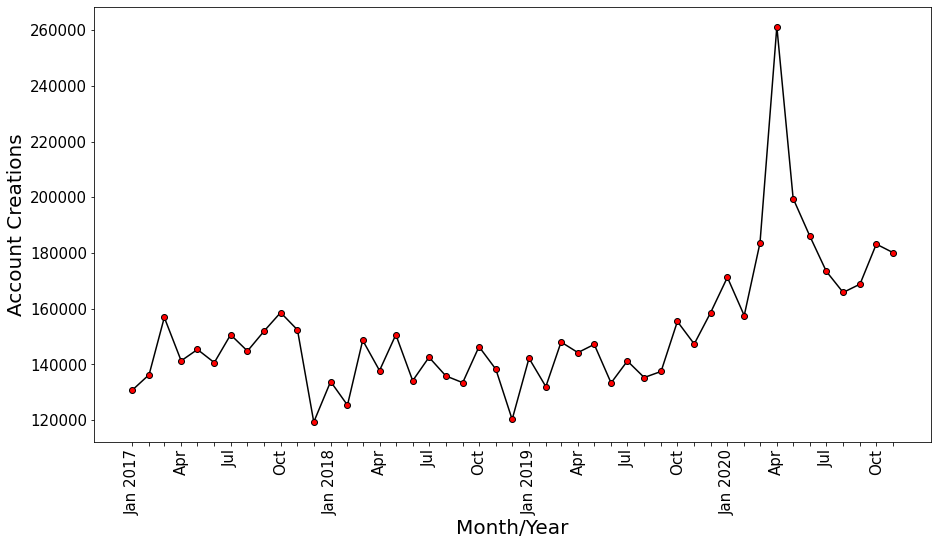

In [64]:
# yearly_monthly_grp.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(yearly_monthly_grp['CreateYearMonth'],yearly_monthly_grp['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(yearly_monthly_grp['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Account Creations',fontsize=20)
plt.grid()
plt.xlabel('Month/Year',fontsize=20)
plt.savefig('figs/SO_UsersCreationYearltMonthly.pdf',bbox_inches='tight')
plt.grid()

# plt.xlabel('Month/Year')
# plt.ylabel('Account Creations')

# Stats tests

In [76]:
yearly_monthly_grp_17_19=yearly_monthly_grp[(yearly_monthly_grp['CreateYearMonth']>='2017-01-01') & (yearly_monthly_grp['CreateYearMonth']<'2020-01-01')]

In [80]:
print(yearly_monthly_grp_17_19.head())
print((yearly_monthly_grp_17_19['CreateYearMonth']).min())
print((yearly_monthly_grp_17_19['CreateYearMonth']).max())
print(len(yearly_monthly_grp_17_19['CreateYearMonth']))

  CreateYearMonth  counts
0      2017-01-01  130696
1      2017-02-01  136260
2      2017-03-01  156821
3      2017-04-01  141237
4      2017-05-01  145311
2017-01-01 00:00:00
2019-12-01 00:00:00
36


In [81]:
yearly_monthly_grp_20=yearly_monthly_grp[(yearly_monthly_grp['CreateYearMonth']>='2020-01-01')]

In [82]:
print(yearly_monthly_grp_20.head())
print((yearly_monthly_grp_20['CreateYearMonth']).min())
print((yearly_monthly_grp_20['CreateYearMonth']).max())
print(len(yearly_monthly_grp_20['CreateYearMonth']))

   CreateYearMonth  counts
36      2020-01-01  171214
37      2020-02-01  157487
38      2020-03-01  183572
39      2020-04-01  261239
40      2020-05-01  199531
2020-01-01 00:00:00
2020-11-01 00:00:00
11


In [83]:
#anova test:
f_oneway(yearly_monthly_grp_17_19['counts'], yearly_monthly_grp_20['counts'])

F_onewayResult(statistic=62.595455226940494, pvalue=4.634986757687298e-10)

In [85]:
#kpss
kpss_test(yearly_monthly_grp_17_19['counts'])
kpss_test(yearly_monthly_grp_20['counts'])

KPSS Statistic: 0.13473809117422234
p-value: 0.1
num lags: 10
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.35601081230714715
p-value: 0.09611602917795381
num lags: 7
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [86]:
adf_test(yearly_monthly_grp_17_19['counts'])
adf_test(yearly_monthly_grp_20['counts'])

Results of Dickey-Fuller Test:
Test Statistic                 -2.831423
p-value                         0.053923
#Lags Used                      3.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.077709e+00
p-value                        1.111256e-07
#Lags Used                     3.000000e+00
Number of Observations Used    7.000000e+00
Critical Value (1%)           -4.938690e+00
Critical Value (5%)           -3.477583e+00
Critical Value (10%)          -2.843868e+00
dtype: float64


In [87]:
np.var(yearly_monthly_grp_20['counts'])

706043115.1735537

In [88]:
yearly_monthly_grp_17=yearly_monthly_grp[(yearly_monthly_grp['CreateYearMonth']>='2017-01-01') & (yearly_monthly_grp['CreateYearMonth']<'2018-01-01')]
np.var(yearly_monthly_grp_17['counts'])

118747546.5763889

In [89]:
yearly_monthly_grp_18=yearly_monthly_grp[(yearly_monthly_grp['CreateYearMonth']>='2018-01-01') & (yearly_monthly_grp['CreateYearMonth']<'2019-01-01')]
np.var(yearly_monthly_grp_18['counts'])

74263116.24305557

In [90]:
yearly_monthly_grp_19=yearly_monthly_grp[(yearly_monthly_grp['CreateYearMonth']>='2019-01-01') & (yearly_monthly_grp['CreateYearMonth']<'2020-01-01')]
np.var(yearly_monthly_grp_19['counts'])

63585466.916666664

In [91]:
kpss_test(yearly_monthly_grp_17['counts'])
kpss_test(yearly_monthly_grp_18['counts'])
kpss_test(yearly_monthly_grp_19['counts'])
kpss_test(yearly_monthly_grp_20['counts'])

KPSS Statistic: 0.27564758767251024
p-value: 0.1
num lags: 8
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.30075641818189264
p-value: 0.1
num lags: 8
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.4052646300446574
p-value: 0.0748859353255787
num lags: 8
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.35601081230714715
p-value: 0.09611602917795381
num lags: 7
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up tabl

In [92]:
adf_test(yearly_monthly_grp_17['counts'])
adf_test(yearly_monthly_grp_18['counts'])
adf_test(yearly_monthly_grp_19['counts'])
adf_test(yearly_monthly_grp_20['counts'])

Results of Dickey-Fuller Test:
Test Statistic                -1.412463
p-value                        0.576287
#Lags Used                     4.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.568444e+01
p-value                        1.459271e-28
#Lags Used                     4.000000e+00
Number of Observations Used    7.000000e+00
Critical Value (1%)           -4.938690e+00
Critical Value (5%)           -3.477583e+00
Critical Value (10%)          -2.843868e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -2.212928
p-value                         0.201587
#Lags Used                      0.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dt

# data stats to put in paper:

In [65]:
data.head()

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes,CreateYear,CreateMonth,CreateYearMonth
0,9883458,2017-01-01 00:00:56.717,2020-11-28T01:11:55.853,2,0,0,2017,1,2017-01-01
1,9947518,2017-01-01 00:01:12.400,2020-10-11T15:09:34.260,0,0,0,2017,1,2017-01-01
2,9947524,2017-01-01 00:04:35.913,2018-06-08T20:13:35.803,1,0,0,2017,1,2017-01-01
3,9947525,2017-01-01 00:06:08.170,2019-07-12T16:35:43.657,0,0,0,2017,1,2017-01-01
4,9947527,2017-01-01 00:09:40.727,2017-01-06T01:26:02.110,0,0,0,2017,1,2017-01-01


In [66]:
max(data["CreateYear"])

2020

In [67]:
data_2017=data[data["CreateYear"]==2017]
data_2017.head()
max(data_2017["CreateYear"])
len(data_2017)

1728421

In [68]:
data_2018=data[data["CreateYear"]==2018]
len(data_2018)

1646531

In [69]:
data_2019=data[data["CreateYear"]==2019]
len(data_2019)

1721658

In [70]:
data_2020=data[data["CreateYear"]==2020]
len(data_2020)

2030093